# Questão 3

In [12]:
#Importamos glob da biblioteca
import glob
#Chamamos de arquivos a lista com todos os arquivos da pasta dados cujo nome tem as coordenadas da cidade
arquivos = glob.glob('dados/*W-TAVG-Trend.txt')

In [25]:
#Definimos uma função que recebe o nome do arquivo e retorna a latitude, longitude e nome da cidade mais próxima ao local do dado
def lat_lon_cidade(arquivo):
    dados = open(arquivo, encoding = "UTF-8")
    dados_linhas = dados.readlines()
    regiao = dados_linhas[4]
    lat_lon = regiao.strip()[5:]
    cidade_prox = dados_linhas[35]
    cidade_prox_desejada = cidade_prox.split(',')[0]
    cidade_mais_prox = cidade_prox_desejada.split(':')[1]
    return (lat_lon, cidade_mais_prox)

In [27]:
#Vamos testar agora a função com todos os arquivos da pasta dados
for arquivo in arquivos:
    print(lat_lon_cidade(arquivo))

('0.80 S, 49.02 W', ' Belém')
('10.45 S, 48.27 W', ' Palmas')
('13.66 S, 38.81 W', ' Salvador')
('15.27 S, 47.50 W', ' Brasília')
('2.41 S, 60.27 W', ' Manaus')
('20.09 S, 44.36 W', ' Belo Horizonte')
('20.09 S, 54.60 W', ' Campo Grande')
('23.31 S, 42.82 W', ' Rio de Janeiro')
('23.31 S, 46.31 W', ' São Paulo')
('24.92 S, 49.66 W', ' Curitiba')
('29.74 S, 51.69 W', ' Porto Alegre')
('4.02 S, 40.98 W', ' Fortaleza')


# Questão 4

In [28]:
#Importamos numpy da biblioteca
import numpy as np

In [79]:
#Definimos a função que recebe um arquivo da pasta dados e nos dá a temperatura anual estimada
def temp_anual_est(arquivo):
    dados = open(arquivo, encoding = "UTF-8")
    dados_linhas = dados.readlines()
    dados_linhas_temp = dados_linhas[47]
    temp = dados_linhas_temp.split(':')[1]
    temp_abs_est = float(temp.split('+')[0])
    dados_temp = np.loadtxt(arquivo, comments = '%')
    anomalia_anual = np.nan_to_num(dados_temp[:,4])
    return temp_abs_est + anomalia_anual

In [81]:
#Agora testamos a função com cada um dos arquivos na pasta dados
for arquivo in arquivos:
    print(temp_anual_est(arquivo))

[ 26.74   26.74   25.868 ...,  26.74   26.74   26.74 ]
[ 26.15   26.15   25.061 ...,  26.15   26.15   26.15 ]
[ 24.87   24.87   23.763 ...,  24.87   24.87   24.87 ]
[ 21.91   21.91   20.847 ...,  21.91   21.91   21.91 ]
[ 26.72  26.72  26.72 ...,  26.72  26.72  26.72]
[ 21.26   21.26   20.232 ...,  21.26   21.26   21.26 ]
[ 23.68   23.68   22.622 ...,  23.68   23.68   23.68 ]
[ 24.01   24.01   22.961 ...,  24.01   24.01   24.01 ]
[ 19.9    19.9    18.857 ...,  19.9    19.9    19.9  ]
[ 17.6    17.6    16.538 ...,  17.6    17.6    17.6  ]
[ 18.41   18.41   17.306 ...,  18.41   18.41   18.41 ]
[ 27.08   27.08   26.243 ...,  27.08   27.08   27.08 ]


# Questão 5

In [94]:
#Importamos o matplotlib.pyplot para plotar os gráficos
%matplotlib inline
import matplotlib.pyplot as plt

In [95]:
#Definimos a função que nos dá os anos com os meses de forma decimal
def anos_decimais(arquivo):
    dados_do_arquivo = np.loadtxt(arquivo, comments = '%')
    anos = dados_do_arquivo[:,0]
    meses = dados_do_arquivo[:,1]
    return anos+(meses-1)/12

In [96]:
#Testamos a função com cada arquivo
for arquivo in arquivos:
    print(anos_decimais(arquivo))

[ 1845.          1845.08333333  1845.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1824.          1824.08333333  1824.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          1832.08333333  1832.16666667 ...,  2013.5         2013.58333333
  2013.66666667]
[ 1832.          183

In [112]:
#Definimos a função que plota o gráfico dos dados que conseguimos ao longo desta tarefa
def plotar_graficos(arquivo):
    x = anos_decimais(arquivo)
    y = temp_anual_est(arquivo)
    titulo = lat_lon_cidade(arquivo)[0]
    a = lat_lon_cidade(arquivo)[1]
    nome = a.replace(' ','_')
    plt.figure()
    plt.plot(x,y,'r-')
    plt.xlabel('Anos')
    plt.ylabel('Temperatura anual estimada')
    plt.title(titulo)
    plt.savefig(nome+'.png')


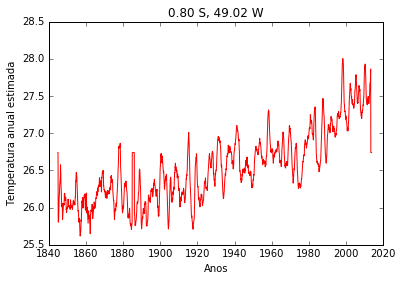

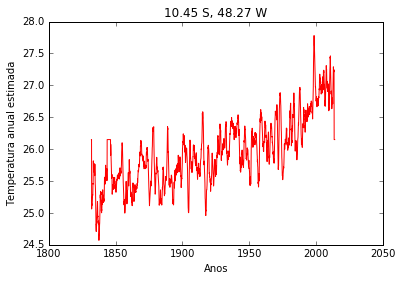

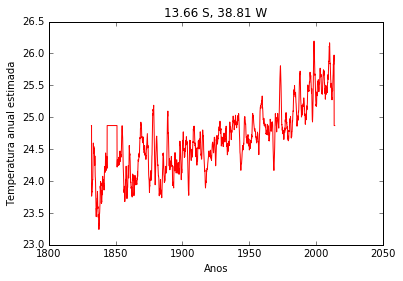

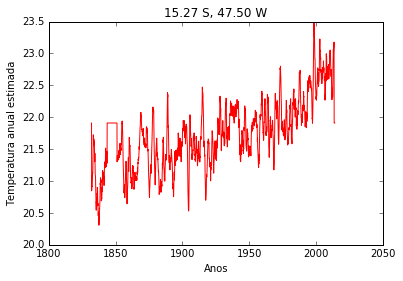

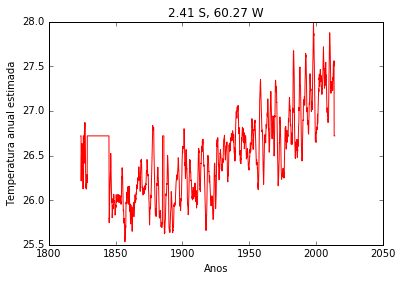

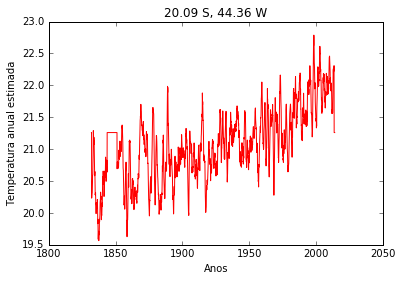

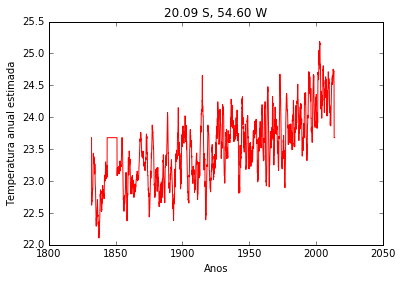

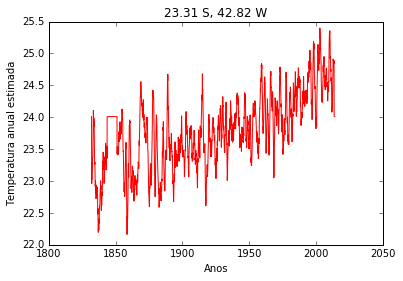

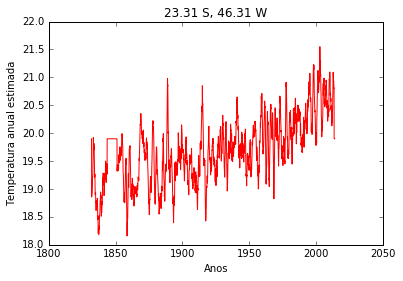

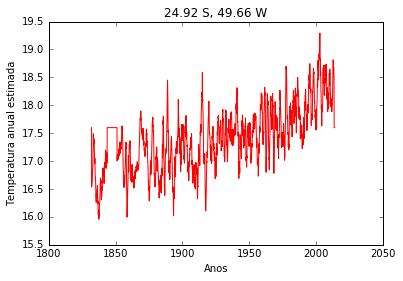

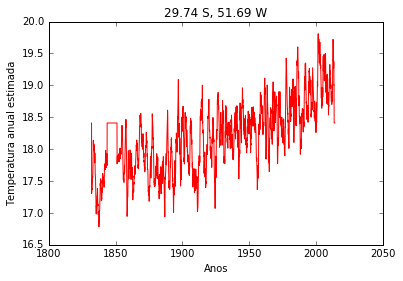

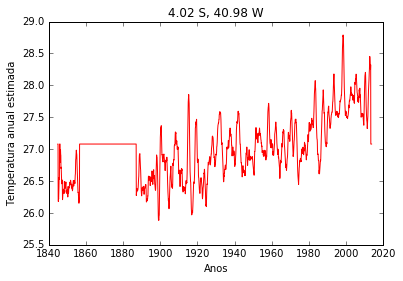

In [113]:
#Testamos a função
for arquivo in arquivos:
    plotar_graficos(arquivo)